In [1]:
import numpy as np
import pandas as pd
import altair as alt
alt.data_transformers.enable("vegafusion")
import matplotlib as plt

### EDA

In [2]:
full_df = pd.read_csv('data/NFL_Play_by_Play_2009-2017.csv')
full_df.head()

C:\Users\fohy2\AppData\Local\Temp\ipykernel_54380\2596084795.py:1: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  full_df = pd.read_csv('data/NFL_Play_by_Play_2009-2017.csv')


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [3]:
full_df.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,4.076880e+05,407688.000000,407688.000000,346534.000000,407688.000000,407464.000000,407244.000000,406848.000000,406848.000000,407688.000000,...,159190.000000,382734.000000,382734.000000,381101.000000,381101.000000,382679.000000,402147.000000,159187.000000,158926.000000,407688.000000
mean,2.013158e+09,12.316158,2.577412,2.002476,7.374200,1695.268944,20.576762,28.488327,48.644081,7.309403,...,-0.386086,0.534488,0.465965,0.534791,0.465613,0.501320,0.002099,0.015135,-0.010480,2013.018985
std,2.572839e+06,7.149527,1.129750,1.006353,4.642388,1062.801012,17.969326,12.946471,25.070416,4.869987,...,1.972715,0.285574,0.285629,0.287818,0.287867,0.287445,0.045363,0.056490,0.068139,2.576962
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2.011101e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,3.000000,...,-0.961115,0.325123,0.231411,0.321701,0.227694,0.276472,-0.014728,-0.011518,-0.018683,2011.000000
50%,2.013111e+09,12.000000,3.000000,2.000000,7.000000,1800.000000,17.000000,30.000000,49.000000,9.000000,...,0.000000,0.531274,0.469052,0.533609,0.466670,0.504470,0.000000,0.003441,0.000000,2013.000000
75%,2.015121e+09,18.000000,4.000000,3.000000,11.000000,2585.000000,37.000000,39.000000,70.000000,10.000000,...,0.485508,0.769232,0.675530,0.772882,0.678833,0.725477,0.014684,0.035792,0.011431,2015.000000
max,2.017123e+09,35.000000,5.000000,4.000000,15.000000,3600.000000,943.000000,50.000000,99.000000,50.000000,...,9.559834,1.000000,1.000000,1.000000,1.000000,1.000000,0.994848,0.994848,1.000000,2017.000000


In [4]:
full_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407688 entries, 0 to 407687
Data columns (total 102 columns):
 #    Column                       Non-Null Count   Dtype  
---   ------                       --------------   -----  
 0    Date                         407688 non-null  object 
 1    GameID                       407688 non-null  int64  
 2    Drive                        407688 non-null  int64  
 3    qtr                          407688 non-null  int64  
 4    down                         346534 non-null  float64
 5    time                         407464 non-null  object 
 6    TimeUnder                    407688 non-null  int64  
 7    TimeSecs                     407464 non-null  float64
 8    PlayTimeDiff                 407244 non-null  float64
 9    SideofField                  407160 non-null  object 
 10   yrdln                        406848 non-null  float64
 11   yrdline100                   406848 non-null  float64
 12   ydstogo                      407688 non-nu

In [5]:
df = full_df.iloc[:, 2:19]
df.head()

,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc
0,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....
1,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....
2,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...
3,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...
4,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...


In [6]:
df.to_csv('data/df.csv')

In [7]:
# columns with missing values
missing_cols = []
for col in df.columns:
    if df[col].isnull().sum() != 0:
        missing_cols.append(col)
missing_cols

['down',
 'time',
 'TimeSecs',
 'PlayTimeDiff',
 'SideofField',
 'yrdln',
 'yrdline100',
 'GoalToGo',
 'FirstDown',
 'posteam',
 'DefensiveTeam',
 'desc']

In [8]:
for col in missing_cols:
    print(f'{df[col].isnull().sum() / df.shape[0] * 100:.4f}% missing in {col}')

15.0002% missing in down
0.0549% missing in time
0.0549% missing in TimeSecs
0.1089% missing in PlayTimeDiff
0.1295% missing in SideofField
0.2060% missing in yrdln
0.2060% missing in yrdline100
0.2060% missing in GoalToGo
7.0669% missing in FirstDown
6.1302% missing in posteam
6.1302% missing in DefensiveTeam
0.0005% missing in desc


In [9]:
# Create complete case df
df_cc = df.dropna()

In [10]:
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346515 entries, 1 to 407686
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Drive          346515 non-null  int64  
 1   qtr            346515 non-null  int64  
 2   down           346515 non-null  float64
 3   time           346515 non-null  object 
 4   TimeUnder      346515 non-null  int64  
 5   TimeSecs       346515 non-null  float64
 6   PlayTimeDiff   346515 non-null  float64
 7   SideofField    346515 non-null  object 
 8   yrdln          346515 non-null  float64
 9   yrdline100     346515 non-null  float64
 10  ydstogo        346515 non-null  int64  
 11  ydsnet         346515 non-null  int64  
 12  GoalToGo       346515 non-null  float64
 13  FirstDown      346515 non-null  float64
 14  posteam        346515 non-null  object 
 15  DefensiveTeam  346515 non-null  object 
 16  desc           346515 non-null  object 
dtypes: float64(7), int64(5), object(5)

In [11]:
df_cc.corr(numeric_only=True).style.background_gradient()

,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown
Drive,1.000000,0.918266,-0.006639,-0.230326,-0.943289,-0.104303,0.008734,-0.014476,0.022265,-0.037066,-0.002191,-0.016966
qtr,0.918266,1.000000,0.009888,-0.014737,-0.966469,-0.067569,0.002984,-0.043521,0.011428,0.013470,0.015525,-0.006220
down,-0.006639,0.009888,1.000000,-0.021463,-0.015413,0.021489,0.003985,-0.049613,-0.245336,-0.010046,-0.010253,0.281199
TimeUnder,-0.230326,-0.014737,-0.021463,1.000000,0.270448,0.111578,0.006385,0.098262,-0.001218,-0.076134,-0.038938,0.048290
TimeSecs,-0.943289,-0.966469,-0.015413,0.270448,1.000000,0.092277,-0.001356,0.067434,-0.011142,-0.032653,-0.025049,0.018544
PlayTimeDiff,-0.104303,-0.067569,0.021489,0.111578,0.092277,1.000000,0.080600,-0.135391,-0.134452,0.151898,0.012056,0.009496
yrdln,0.008734,0.002984,0.003985,0.006385,-0.001356,0.080600,1.000000,0.086098,0.060665,-0.108101,-0.445877,0.126540
yrdline100,-0.014476,-0.043521,-0.049613,0.098262,0.067434,-0.135391,0.086098,1.000000,0.225085,-0.692177,-0.467683,0.120612
ydstogo,0.022265,0.011428,-0.245336,-0.001218,-0.011142,-0.134452,0.060665,0.225085,1.000000,-0.192525,-0.187139,-0.156234
ydsnet,-0.037066,0.013470,-0.010046,-0.076134,-0.032653,0.151898,-0.108101,-0.692177,-0.192525,1.000000,0.337306,0.052383


In [12]:
# Pick our target
target_column = 'PlayTimeDiff'

alt.Chart(df_cc).mark_bar().encode(
    alt.X(target_column).bin(maxbins=50),
    y='count()'
)

alt.Chart(...)

### MCAR

In [13]:
df_missing = df_cc.copy()
proportion_to_replace = 0.4

num_values_to_replace = int(len(df_missing) * proportion_to_replace)
print(f'{num_values_to_replace} values to be replaced by NaN')

random_indices = np.random.choice(
    df_missing.index, size=num_values_to_replace, replace=False)

df_missing.loc[random_indices, target_column] = np.nan

138606 values to be replaced by NaN


In [14]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346515 entries, 1 to 407686
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Drive          346515 non-null  int64  
 1   qtr            346515 non-null  int64  
 2   down           346515 non-null  float64
 3   time           346515 non-null  object 
 4   TimeUnder      346515 non-null  int64  
 5   TimeSecs       346515 non-null  float64
 6   PlayTimeDiff   207909 non-null  float64
 7   SideofField    346515 non-null  object 
 8   yrdln          346515 non-null  float64
 9   yrdline100     346515 non-null  float64
 10  ydstogo        346515 non-null  int64  
 11  ydsnet         346515 non-null  int64  
 12  GoalToGo       346515 non-null  float64
 13  FirstDown      346515 non-null  float64
 14  posteam        346515 non-null  object 
 15  DefensiveTeam  346515 non-null  object 
 16  desc           346515 non-null  object 
dtypes: float64(7), int64(5), object(5)

In [15]:
df_missing[df_missing[target_column].isnull()].head()

,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc
1,1,1,1.0,14:53,15,3593.0,NaN,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....
4,1,1,4.0,13:27,14,3507.0,NaN,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...
5,2,1,1.0,13:16,14,3496.0,NaN,TEN,2.0,98.0,10,0,0.0,0.0,TEN,PIT,(13:16) C.Johnson up the middle to TEN 2 for n...
11,3,1,1.0,10:21,11,3321.0,NaN,TEN,30.0,30.0,10,12,0.0,0.0,PIT,TEN,(10:21) W.Parker right guard to TEN 31 for -1 ...
12,3,1,2.0,09:43,10,3283.0,NaN,TEN,31.0,31.0,11,21,0.0,0.0,PIT,TEN,(9:43) B.Roethlisberger pass short right to H....


In [16]:
def mean_difference(pred_df):
    true_mean = np.mean(df_cc[target_column])
    imputed_mean = np.mean(pred_df[target_column])
    return (imputed_mean / true_mean - 1)

In [17]:
def std_difference(pred_df):
    true_std = np.std(df_cc[target_column])
    imputed_std = np.std(pred_df[target_column])    
    return (imputed_std / true_std - 1)

### Mean imputation

In [18]:
df_mean_imp = df_missing.copy()

In [19]:
yrdln_mean = np.mean(df_mean_imp[target_column])
df_mean_imp.fillna(yrdln_mean, inplace=True)
print(f'Missing value replaced by mean = {yrdln_mean:.2f}')

Missing value replaced by mean = 22.44


In [20]:
mean_imp_mean_diff = mean_difference(df_mean_imp)
mean_imp_std_diff = std_difference(df_mean_imp)

In [21]:
from sklearn.metrics import mean_squared_error
mean_imp_mse = mean_squared_error(
    df_cc[target_column], df_mean_imp[target_column])

### Pooled Regression Imputation

In [22]:
df_reg_imp = df_missing.copy()

In [23]:
df_reg_imp = df_reg_imp.select_dtypes(include='number')

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

reg_imp = IterativeImputer(max_iter=100, random_state=123)
reg_imp.fit_transform(df_reg_imp)

array([[ 1.,  1.,  1., ...,  5.,  0.,  0.],
       [ 1.,  1.,  2., ...,  2.,  0.,  0.],
       [ 1.,  1.,  3., ...,  2.,  0.,  0.],
       ...,
       [29.,  4.,  3., ..., -4.,  0.,  0.],
       [29.,  4.,  4., ...,  9.,  0.,  1.],
       [30.,  4.,  1., ..., -1.,  0.,  0.]])

In [25]:
df_reg_imp = pd.DataFrame(np.round(reg_imp.transform(df_reg_imp)), columns=df_reg_imp.columns)

In [26]:
df_reg_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346515 entries, 0 to 346514
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Drive         346515 non-null  float64
 1   qtr           346515 non-null  float64
 2   down          346515 non-null  float64
 3   TimeUnder     346515 non-null  float64
 4   TimeSecs      346515 non-null  float64
 5   PlayTimeDiff  346515 non-null  float64
 6   yrdln         346515 non-null  float64
 7   yrdline100    346515 non-null  float64
 8   ydstogo       346515 non-null  float64
 9   ydsnet        346515 non-null  float64
 10  GoalToGo      346515 non-null  float64
 11  FirstDown     346515 non-null  float64
dtypes: float64(12)
memory usage: 31.7 MB


In [27]:
reg_imp_mean_diff = mean_difference(df_reg_imp)
reg_imp_std_diff = std_difference(df_reg_imp)

In [28]:
df_reg_imp.corr(numeric_only=True)[[target_column]].style.background_gradient()

,PlayTimeDiff
Drive,-0.130871
qtr,-0.083939
down,0.026341
TimeUnder,0.143504
TimeSecs,0.115819
PlayTimeDiff,1.000000
yrdln,0.101462
yrdline100,-0.167495
ydstogo,-0.169717
ydsnet,0.190225


In [29]:
reg_imp_mse = mean_squared_error(
    df_cc[target_column], df_reg_imp[target_column])

### KNN Imputation

In [30]:
# train_df = df_missing.dropna().select_dtypes(include='number')
# test_df = df_missing.query('yrdln.isnull()').select_dtypes(include='number')

In [31]:
# df_knn_imp = df_missing.copy()
# df_knn_imp = df_knn_imp.select_dtypes(include='number')

In [32]:
# from sklearn.impute import KNNImputer

# knn = KNNImputer(n_neighbors=5)
# df_knn_imp = knn.fit_transform(df_knn_imp)

In [33]:
# from sklearn.impute import KNNImputer

# knn = KNNImputer(n_neighbors=5)
# knn.fit(df_knn_imp)
# df_knn_imp = knn.transform(df_knn_imp)

In [34]:
# df_knn_imp = pd.DataFrame(df_knn_imp, columns=df_reg_imp.columns)
# df_knn_imp.head()

In [35]:
# true_mean = np.mean(df_cc[target_column])
# knn_imputed_mean = np.mean(df_knn_imp[target_column])

# print(f'True mean = {round(true_mean, 3)}')
# print(f'Regression imputed mean = {round(knn_imputed_mean, 3)}')
# print(f'Change in mean = {(knn_imputed_mean / true_mean - 1) * 100:.3f}%')

In [36]:
# true_std = np.std(df_cc[target_column])
# knn_imputed_std = np.std(df_knn_imp[target_column])

# print(f'True std = {round(true_std, 3)}')
# print(f'Regression imputed std = {round(knn_imputed_std, 3)}')
# print(f'Change in std = {(knn_imputed_std / true_std - 1) * 100:.3f}%')

In [37]:
# df_knn_imp.corr(numeric_only=True)[[target_column]].style.background_gradient()

In [38]:
# mse_knn_imputed = mean_squared_error(df_cc[target_column], df_knn_imp[target_column])

# print(round(mse_knn_imputed, 3))

### Random Forest Imputation

In [39]:
df_rf_imp = df_missing.copy()

In [40]:
train_df = df_rf_imp.dropna().select_dtypes(include='number') # .iloc[:100,]
test_df = df_rf_imp[df_rf_imp[target_column].isnull()].select_dtypes(
    include='number')

In [41]:
print(train_df.shape)
print(test_df.shape)

(207909, 12)
(138606, 12)


In [42]:
from sklearn.model_selection import *
X_train = train_df.drop(columns=[target_column])
y_train = train_df[[target_column]]

X_test = test_df.drop(columns=[target_column])
y_test = test_df[[target_column]]

In [43]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

c:\Users\fohy2\miniconda3\envs\machine_learning\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [44]:
rf.predict(X_test)

array([ 8.84 , 10.885, 10.54 , ...,  8.09 , 16.33 ,  5.09 ])

In [45]:
rf_pred = pd.DataFrame(rf.predict(X_test), columns=[
                       target_column], index=sorted(random_indices))
imp_test = rf_pred.join(X_test)
imp_test = imp_test[train_df.columns]
df_rf_imp = pd.concat([imp_test, train_df], axis=0).sort_index()
df_rf_imp

,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown
1,1,1,1.0,15,3593.0,8.840,42.0,58.0,10,5,0.0,0.0
2,1,1,2.0,15,3556.0,37.000,47.0,53.0,5,2,0.0,0.0
3,1,1,3.0,14,3515.0,41.000,44.0,56.0,8,2,0.0,0.0
4,1,1,4.0,14,3507.0,10.885,44.0,56.0,8,2,0.0,1.0
5,2,1,1.0,14,3496.0,10.540,2.0,98.0,10,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
407681,29,4,1.0,1,38.0,8.090,27.0,73.0,10,5,0.0,0.0
407682,29,4,2.0,1,32.0,16.330,32.0,68.0,5,-4,0.0,0.0
407684,29,4,3.0,1,28.0,0.000,23.0,77.0,14,-4,0.0,0.0
407685,29,4,4.0,1,24.0,4.000,23.0,77.0,14,9,0.0,1.0


In [46]:
df_rf_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346515 entries, 1 to 407686
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Drive         346515 non-null  int64  
 1   qtr           346515 non-null  int64  
 2   down          346515 non-null  float64
 3   TimeUnder     346515 non-null  int64  
 4   TimeSecs      346515 non-null  float64
 5   PlayTimeDiff  346515 non-null  float64
 6   yrdln         346515 non-null  float64
 7   yrdline100    346515 non-null  float64
 8   ydstogo       346515 non-null  int64  
 9   ydsnet        346515 non-null  int64  
 10  GoalToGo      346515 non-null  float64
 11  FirstDown     346515 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 34.4 MB


In [47]:
rf_imp_mean_diff = mean_difference(df_rf_imp)
rf_imp_std_diff = std_difference(df_rf_imp)

In [48]:
df_rf_imp.corr(numeric_only=True)[[target_column]].style.background_gradient()

,PlayTimeDiff
Drive,-0.115879
qtr,-0.074890
down,0.024608
TimeUnder,0.126411
TimeSecs,0.102919
PlayTimeDiff,1.000000
yrdln,0.091348
yrdline100,-0.151477
ydstogo,-0.150155
ydsnet,0.171566


In [49]:
rf_imp_mse = mean_squared_error(
    df_cc[target_column], df_rf_imp[target_column])

### Gradient Boosted Tree Imputation

In [50]:
from lightgbm.sklearn import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 207909, number of used features: 11
[LightGBM] [Info] Start training from score 22.435176


LGBMRegressor()

In [51]:
lgbm_pred = pd.DataFrame(lgbm.predict(X_test), columns=[
                       target_column], index=sorted(random_indices))
lgbm_imp_test = lgbm_pred.join(X_test)
lgbm_imp_test = lgbm_imp_test[train_df.columns]
df_lgbm_imp = pd.concat([lgbm_imp_test, train_df], axis=0).sort_index()
df_lgbm_imp

,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown
1,1,1,1.0,15,3593.0,8.100314,42.0,58.0,10,5,0.0,0.0
2,1,1,2.0,15,3556.0,37.000000,47.0,53.0,5,2,0.0,0.0
3,1,1,3.0,14,3515.0,41.000000,44.0,56.0,8,2,0.0,0.0
4,1,1,4.0,14,3507.0,12.799217,44.0,56.0,8,2,0.0,1.0
5,2,1,1.0,14,3496.0,7.834559,2.0,98.0,10,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
407681,29,4,1.0,1,38.0,8.990952,27.0,73.0,10,5,0.0,0.0
407682,29,4,2.0,1,32.0,16.188970,32.0,68.0,5,-4,0.0,0.0
407684,29,4,3.0,1,28.0,0.000000,23.0,77.0,14,-4,0.0,0.0
407685,29,4,4.0,1,24.0,4.000000,23.0,77.0,14,9,0.0,1.0


In [52]:
df_lgbm_imp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 346515 entries, 1 to 407686
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Drive         346515 non-null  int64  
 1   qtr           346515 non-null  int64  
 2   down          346515 non-null  float64
 3   TimeUnder     346515 non-null  int64  
 4   TimeSecs      346515 non-null  float64
 5   PlayTimeDiff  346515 non-null  float64
 6   yrdln         346515 non-null  float64
 7   yrdline100    346515 non-null  float64
 8   ydstogo       346515 non-null  int64  
 9   ydsnet        346515 non-null  int64  
 10  GoalToGo      346515 non-null  float64
 11  FirstDown     346515 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 34.4 MB


In [53]:
lgbm_imp_mean_diff = mean_difference(df_lgbm_imp)
lgbm_imp_std_diff = std_difference(df_lgbm_imp)

In [54]:
df_lgbm_imp.corr(numeric_only=True)[
    [target_column]].style.background_gradient()

,PlayTimeDiff
Drive,-0.119104
qtr,-0.077411
down,0.024247
TimeUnder,0.130610
TimeSecs,0.106446
PlayTimeDiff,1.000000
yrdln,0.094236
yrdline100,-0.155722
ydstogo,-0.155743
ydsnet,0.176974


In [55]:
lgbm_imp_mse = mean_squared_error(
    df_cc[target_column], df_lgbm_imp[target_column])

#### LGBM optimization

In [56]:
param_grid_lgbm = {
    'num_leaves': np.arange(20, 1000, 10),
    'max_depth': np.random.randint(3, 18, 10),
    'learning_rate': np.random.uniform(0.01, 0.3, 20),
    'min_child_samples': np.arange(10, 1000, 10),
    'subsample': np.random.uniform(0.5, 1.0, 10),
}

In [57]:
random_search_lgbm = RandomizedSearchCV(
    lgbm,
    param_distributions=param_grid_lgbm,
    n_iter=80,
    n_jobs=-1,
    return_train_score=True
)
random_search_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 207909, number of used features: 11
[LightGBM] [Info] Start training from score 22.435176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


RandomizedSearchCV(estimator=LGBMRegressor(), n_iter=80, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.239567  , 0.12612288, 0.23661124, 0.21640066, 0.26271366,
       0.06376436, 0.06475714, 0.04545793, 0.20670972, 0.21195529,
       0.236625  , 0.02281024, 0.14543498, 0.11030683, 0.1573734 ,
       0.0317601 , 0.06097691, 0.19036219, 0.2513059 , 0.09507389]),
                                        'max_depth': array([ 8, 15,  7,...
       410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530,
       540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660,
       670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790,
       800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920,
       930, 940, 950, 960, 970, 980, 990]),
                                        'subsample': array([0.58868492, 0.97591325, 0.72938612, 0.78277456, 0.88025817,
       0.83677134, 0.78469607, 0.76974778, 0.79149581, 0.73870109])},
                   return_train_score=True)

In [58]:
pd.DataFrame(random_search_lgbm.cv_results_)[
    [
        "mean_test_score",
        "param_num_leaves",
        "param_max_depth",
        "param_learning_rate",
        "param_min_child_samples",
        "param_subsample",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

rank_test_score,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
mean_test_score,0.390712,0.390599,0.390058,0.390025,0.389765,0.389708,0.389571,0.389478,0.389297,0.389279,...,0.381834,0.381797,0.381078,0.380546,0.380539,0.379444,0.375565,0.3747,0.372715,0.37191
param_num_leaves,100,430,600,410,340,800,160,150,370,290,...,220,590,340,760,370,980,250,530,900,980
param_max_depth,15,8,8,17,10,15,8,15,7,17,...,8,8,7,15,13,13,15,15,8,8
param_learning_rate,0.063764,0.095074,0.157373,0.045458,0.063764,0.063764,0.157373,0.063764,0.190362,0.064757,...,0.20671,0.060977,0.063764,0.03176,0.236611,0.211955,0.239567,0.02281,0.03176,0.02281
param_min_child_samples,320,210,290,50,340,310,400,430,250,30,...,20,920,890,610,160,120,90,440,890,350
param_subsample,0.880258,0.791496,0.588685,0.784696,0.769748,0.782775,0.880258,0.975913,0.791496,0.738701,...,0.769748,0.782775,0.880258,0.975913,0.588685,0.729386,0.769748,0.588685,0.836771,0.784696
mean_fit_time,21.678259,16.099723,10.956881,56.928371,17.27001,37.238711,11.967496,17.572046,8.093408,45.012723,...,17.522868,10.086205,9.48717,26.591739,24.280664,26.103451,27.409251,37.42902,12.370209,15.732721


In [59]:
lgbm_opt = LGBMRegressor(**random_search_lgbm.best_params_)
lgbm_opt

LGBMRegressor(learning_rate=0.06376436382504641, max_depth=15,
              min_child_samples=320, num_leaves=100,
              subsample=0.880258173754083)

In [60]:
lgbm_opt.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 628
[LightGBM] [Info] Number of data points in the train set: 207909, number of used features: 11
[LightGBM] [Info] Start training from score 22.435176


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMRegressor(learning_rate=0.06376436382504641, max_depth=15,
              min_child_samples=320, num_leaves=100,
              subsample=0.880258173754083)

In [61]:
lgbm_pred_opt = pd.DataFrame(lgbm_opt.predict(X_test), columns=[
    target_column], index=sorted(random_indices))
lgbm_opt_imp_test = lgbm_pred_opt.join(X_test)
lgbm_opt_imp_test = lgbm_opt_imp_test[train_df.columns]
df_lgbm_imp_opt = pd.concat([lgbm_opt_imp_test, train_df], axis=0).sort_index()
df_lgbm_imp_opt

,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown
1,1,1,1.0,15,3593.0,8.764788,42.0,58.0,10,5,0.0,0.0
2,1,1,2.0,15,3556.0,37.000000,47.0,53.0,5,2,0.0,0.0
3,1,1,3.0,14,3515.0,41.000000,44.0,56.0,8,2,0.0,0.0
4,1,1,4.0,14,3507.0,14.908055,44.0,56.0,8,2,0.0,1.0
5,2,1,1.0,14,3496.0,9.779114,2.0,98.0,10,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
407681,29,4,1.0,1,38.0,9.128304,27.0,73.0,10,5,0.0,0.0
407682,29,4,2.0,1,32.0,16.893173,32.0,68.0,5,-4,0.0,0.0
407684,29,4,3.0,1,28.0,0.000000,23.0,77.0,14,-4,0.0,0.0
407685,29,4,4.0,1,24.0,4.000000,23.0,77.0,14,9,0.0,1.0


In [62]:
lgbm_opt_imp_mean_diff = mean_difference(df_lgbm_imp_opt)
lgbm_opt_imp_std_diff = std_difference(df_lgbm_imp_opt)

In [63]:
lgbm_opt_imp_mse = mean_squared_error(
    df_cc[target_column], df_lgbm_imp_opt[target_column])

### Comparison

In [64]:
from collections import defaultdict

In [65]:
methods = ['mean', 'reg', 'rf', 'lgbm', 'lgbm_opt']
metrics = ['mean_diff', 'std_diff', 'mse']
results = defaultdict(dict)

for method in methods:
    for metric in metrics:
        results[method][metric] = locals()[method + '_imp_' + metric]

results = pd.DataFrame(results).T.reset_index(names = 'methods')

In [66]:
results

,methods,mean_diff,std_diff,mse
0,mean,-0.001064,-0.227818,127.022065
1,reg,-0.000911,-0.208892,117.725591
2,rf,-0.001952,-0.122528,83.839898
3,lgbm,-0.001566,-0.139824,78.649945
4,lgbm_opt,-0.001504,-0.136124,77.979352


In [67]:
alt.Chart(results).mark_bar().encode(
    x='mean_diff',
    y=alt.Y('methods', sort=methods)
)

alt.Chart(...)

In [81]:
bar_charts = alt.Chart(results).mark_bar().encode(
    x=alt.X(alt.repeat("repeat"), type='quantitative'),
    y=alt.Y('methods', sort=methods)
).repeat(
    metrics
).properties(
    columns=1
)
bar_charts

alt.RepeatChart(...)

In [87]:
import altair as alt

# Assuming `results` is your dataframe and `metrics` is a list of column names in `results`
charts = None
for metric in metrics:
    chart = alt.Chart(results).mark_bar().encode(
        x=alt.X(metric),
        y=alt.Y('methods', sort=methods)
    )
    if charts is None:
        charts = chart
    else:
        charts &= chart

# Now you can display the concatenated chart
charts

alt.VConcatChart(...)

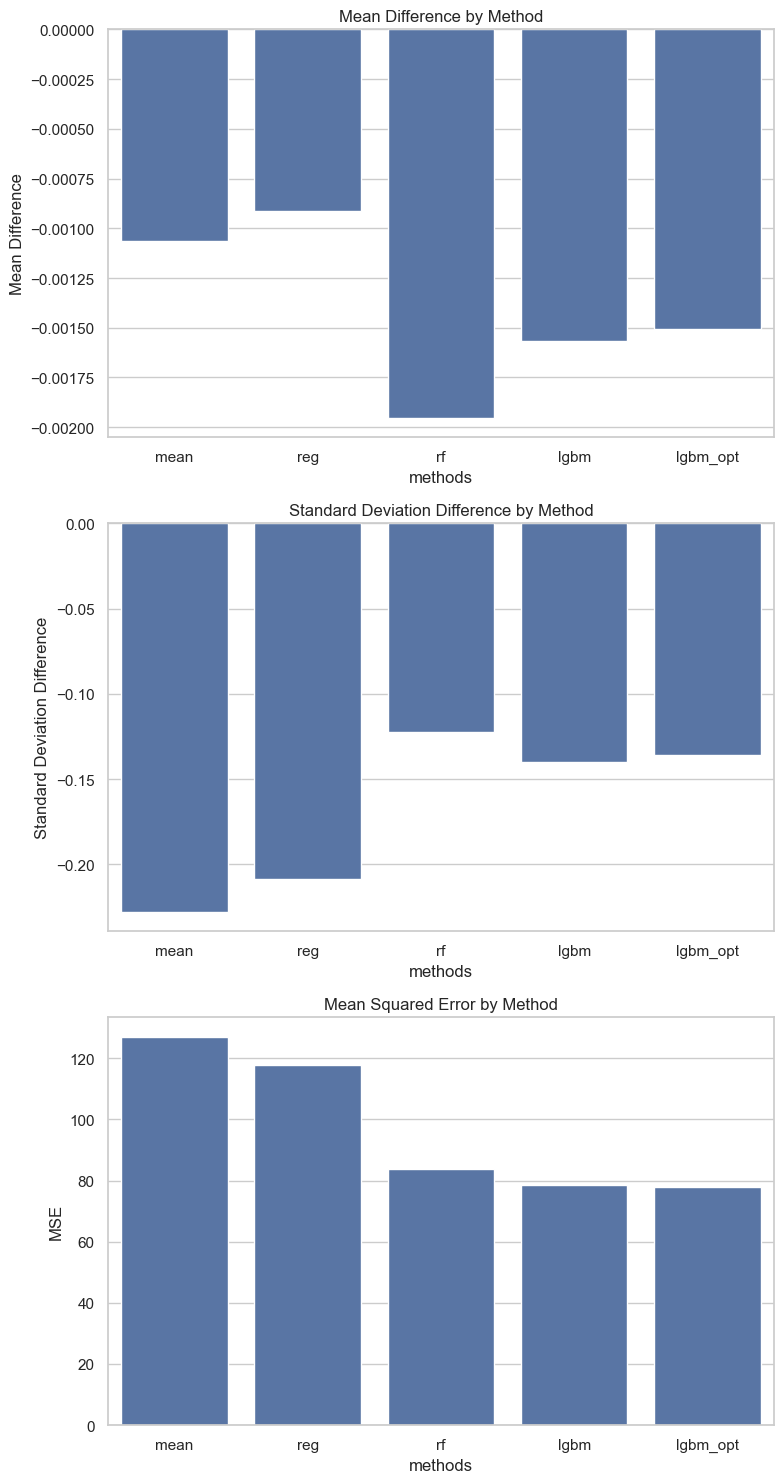

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'results' DataFrame already exists with the specified columns
# results = pd.DataFrame({
#     "methods": ["mean", "reg", "rf", "lgbm", "lgbm_opt"],
#     "mean_diff": [-0.001064, -0.000911, -0.001952, -0.001566, -0.001504],
#     "std_diff": [-0.227818, -0.208892, -0.122528, -0.139824, -0.136124],
#     "mse": [127.022065, 117.725591, 83.839898, 78.649945, 77.979352]
# })

# Set the style
sns.set_theme(style="whitegrid")

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(8, 15))

# Mean difference plot
sns.barplot(ax=axes[0], x='methods', y='mean_diff', data=results)
axes[0].set_title('Mean Difference by Method')
axes[0].set_ylabel('Mean Difference')

# Standard deviation difference plot
sns.barplot(ax=axes[1], x='methods', y='std_diff', data=results)
axes[1].set_title('Standard Deviation Difference by Method')
axes[1].set_ylabel('Standard Deviation Difference')

# Mean squared error plot
sns.barplot(ax=axes[2], x='methods', y='mse', data=results)
axes[2].set_title('Mean Squared Error by Method')
axes[2].set_ylabel('MSE')

plt.tight_layout()
plt.show()